In [1]:
# Import Basic Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [4]:
# Load Dataset

In [5]:
Train = pd.read_csv("train_LZdllcl.csv")

Train.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [6]:
# Basic Feature Engineering on Train Dataset

In [7]:
Train.shape

(54808, 14)

In [8]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [9]:
Train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [10]:
Train.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

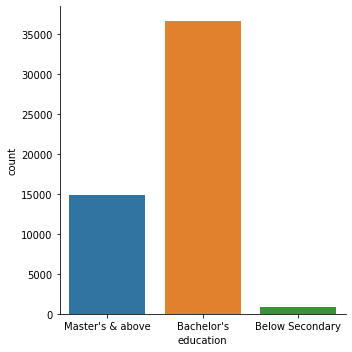

In [11]:
sns.catplot(data = Train, x = "education", kind = "count")
plt.show()

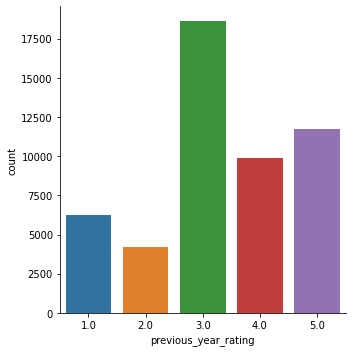

In [12]:
sns.catplot(data = Train, x = "previous_year_rating", kind = "count")
plt.show()

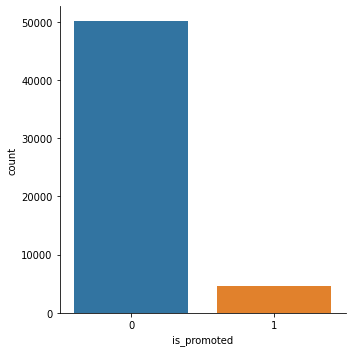

In [13]:
sns.catplot(data = Train, x = "is_promoted", kind = "count")
plt.show()

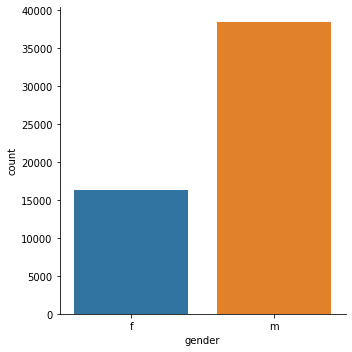

In [14]:
sns.catplot(data = Train, x = "gender", kind = "count")
plt.show()

In [15]:
#Before filling missing values, we have to encode string values

In [16]:
# Encoding the Varibles

le=LabelEncoder()

Train[["department", "region", "education", "gender", "recruitment_channel"]] = Train[["department", "region", "education", "gender", "recruitment_channel"]].apply(le.fit_transform)

In [17]:
# Filling missing values with mean

Train["education"].fillna(Train["education"].mean(),inplace =True) #skewed data better to replace NaN values with the median values

Train["previous_year_rating"].fillna(Train["previous_year_rating"].mean(),inplace =True) #skewed data better to replace NaN values with the median values

In [18]:
Train.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [19]:
# Basic Feature Engineering on Train Dataset

In [20]:
Test = pd.read_csv("test_2umaH9m.csv")

Test.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
5,46232,Procurement,region_7,Bachelor's,m,sourcing,1,36,3.0,2,0,0,68
6,54542,Finance,region_2,Bachelor's,m,other,1,33,5.0,3,1,0,57
7,67269,Analytics,region_22,Bachelor's,m,sourcing,2,36,3.0,3,0,0,85
8,66174,Technology,region_7,Master's & above,m,other,1,51,4.0,11,0,0,75
9,76303,Technology,region_22,Bachelor's,m,sourcing,1,29,5.0,2,1,0,76


In [21]:
Test.shape

(23490, 13)

In [22]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [23]:
Test.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [24]:
Test.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

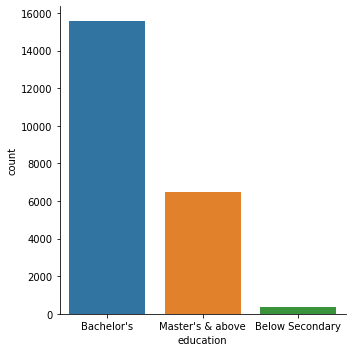

In [25]:
sns.catplot(data = Test, x = "education", kind = "count")
plt.show()

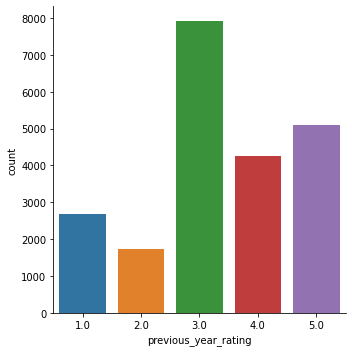

In [26]:
sns.catplot(data = Test, x = "previous_year_rating", kind = "count")
plt.show()

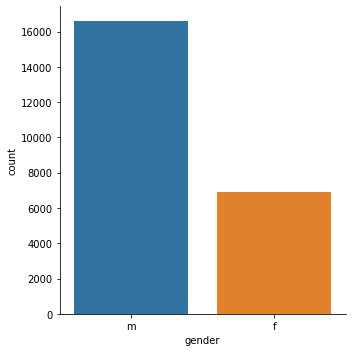

In [27]:
sns.catplot(data = Test, x = "gender", kind = "count")
plt.show()

In [28]:
#Before filling missing values, we have to encode string values

In [29]:
# Encoding the Varibles

le=LabelEncoder()

Test[["department", "region", "education", "gender", "recruitment_channel"]] = Test[["department", "region", "education", "gender", "recruitment_channel"]].apply(le.fit_transform)

In [30]:
# Filling missing values with mean

Test["education"].fillna(Test["education"].mean(),inplace =True) #skewed data better to replace NaN values with the median values

Test["previous_year_rating"].fillna(Test["previous_year_rating"].mean(),inplace =True) #skewed data better to replace NaN values with the median values

In [31]:
Test.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [32]:
Sample_submission = pd.read_csv("sample_submission_M0L0uXE.csv")

Sample_submission.head(10)

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
5,46232,0
6,54542,0
7,67269,0
8,66174,0
9,76303,0


In [33]:
x_train = Train.drop(columns = ["is_promoted"])
y_train = Train["is_promoted"]
x_test = Test
y_test = Sample_submission["is_promoted"]

In [34]:
# Prepare multiple models

In [35]:
models = {"LogisticRegression" : LogisticRegression(),
          "DecisionTreeClassifier" : DecisionTreeClassifier(),
          "SVM" : SVC(),
          "KNeighborsClassifier" : KNeighborsClassifier(),
          "GNB" : GaussianNB(),
          "RandomForestClassifier" : RandomForestClassifier(),
          "AdaBoostClassifier" : AdaBoostClassifier(),
          "GradientBoostingClassifier" : GradientBoostingClassifier()}

In [36]:
### Function for training the multiple models and generating accuracy

In [37]:
#modelAccuracy-> models,x,y,scaleFlag=0,1,2
def Model_Accuracy(models, x, y, Scale_Flag):
    acc_result={}
    for name,model in models.items():
        if(Scale_Flag==1):
            model_pipeline = Pipeline([("MinMax",MinMaxScaler()),('model',model)])
        elif(Scale_Flag==2):
            model_pipeline = Pipeline([("standardScaler",StandardScaler()),('model',model)])
        else:
            model_pipeline = Pipeline([('model',model)])
        #model train and prediction
        model_fit = model_pipeline.fit(x_train,y_train)
        y_pred = model_fit.predict(x_test)
        acc = accuracy_score(y_test,y_pred)
        print("The Accuracy for ",name," is :",acc)
        acc_result[name] = acc
    return acc_result

In [38]:
### Function for getting a model with highest accuracy

In [39]:
def Best_Model(model_result):
    high = 0
    for name,acc in model_result.items():
        if acc > high:
            high = acc
            model_name = name
    print("Best model is ",model_name," with Accuracy ",high)

In [40]:
### Function for getting a best models best parameters

In [41]:
def Best_Parameter(model, params, x_train, y_train):
    cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3)
    grid_cv = GridSearchCV(estimator = model, param_grid = params, cv = cv, scoring = "accuracy")
    res = grid_cv.fit(x_train, y_train)
    print("Best Parameters are ",res.best_params_)
    print("Best Accuracy is ",res.best_score_)

In [42]:
acc = Model_Accuracy(models, x_train, y_train, 0)

The Accuracy for  LogisticRegression  is : 1.0
The Accuracy for  DecisionTreeClassifier  is : 0.9068539804171988
The Accuracy for  SVM  is : 1.0
The Accuracy for  KNeighborsClassifier  is : 0.9938697318007663
The Accuracy for  GNB  is : 0.9979140059599829
The Accuracy for  RandomForestClassifier  is : 0.9764154959557259
The Accuracy for  AdaBoostClassifier  is : 0.979565772669221
The Accuracy for  GradientBoostingClassifier  is : 0.9763729246487867


In [43]:
Best_Model(acc)

Best model is  LogisticRegression  with Accuracy  1.0


In [44]:
### Retraining The model using best parameters

In [45]:
#Retraining The model using best parameters
model = LogisticRegression()

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

In [46]:
### Evaluation of Best Model on testing Dataset

Accuracy is : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23490

    accuracy                           1.00     23490
   macro avg       1.00      1.00      1.00     23490
weighted avg       1.00      1.00      1.00     23490



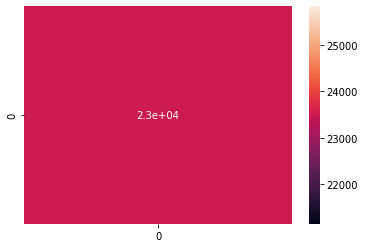

In [47]:
print("Accuracy is :",accuracy_score(y_test,y_pred))

print(classification_report(y_test,y_pred))

cm=confusion_matrix(y_test,y_pred)

sns.heatmap(cm,annot=True)
plt.show()

In [48]:
# Making Sample Submission file

In [49]:
Test["employee_id"]
y_test = pd.DataFrame(y_test)

Final_Submission = pd.concat([Test["employee_id"], y_test], axis=1)

In [50]:
# saving the excel
Final_Submission.to_excel("Final_Submission.xlsx")